# Reuters 뉴스 데이터 분석
- ### 카테고리에 맞는 뉴스 분류

</br>

## 실험 데이터
- ### x_train, x_test = 모든 단어
- ### x_train2, x_test2 = 단어 우선순위 5000
- ### x_train3, x_test3 = 단어 우선순위 8000

</br>

## Model
- ### Naive Bayes
- ### CNB(Complement Naive Bayes Classifier)
- ### Logistic Regression
- ### SVM
- ### Decision Tree
- ### Random Forest
- ### GBM
- ### Voting



In [1]:
import tensorflow
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print(tensorflow.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2.17.1
3.8.0
0.13.2
1.26.4
2.2.2
1.6.0


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = None, test_split=0.2)
(x_train2, y_train2), (x_test2, y_test2) = reuters.load_data(num_words = 5000, test_split=0.2)
(x_train3, y_train3), (x_test3, y_test3) = reuters.load_data(num_words = 8000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print('우선 순위 5000 데이터', x_train.shape)
print('모든 데이터', x_train2.shape)

우선 순위 5000 데이터 (8982,)
모든 데이터 (8982,)


## 모든 단어 사용


### 뉴스 길이 분포

모든 데이터 뉴스의 최대 길이 :2376
모든 데이터 뉴스의 평균 길이 :145.5398574927633


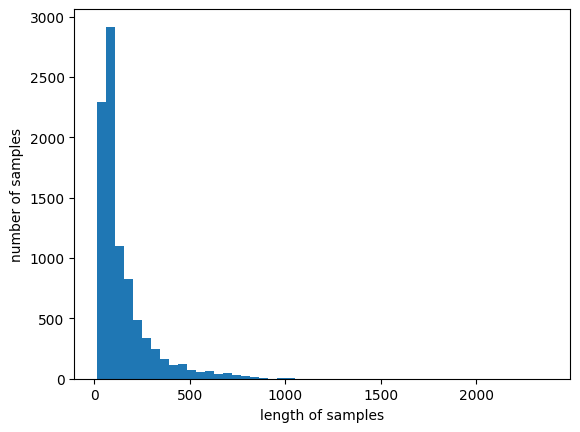

In [4]:
print('모든 데이터 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('모든 데이터 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 뉴스 카테고리별 분포
- #### 카테고리별 불균형

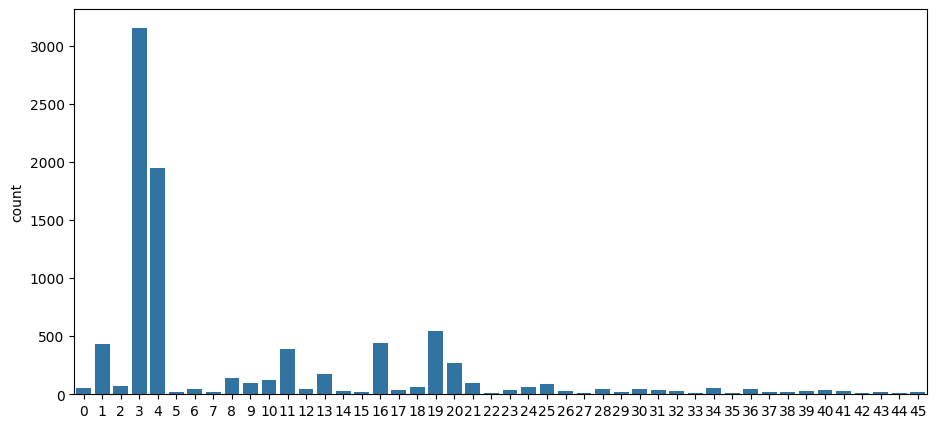

In [5]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x = y_train)
plt.show()

### 인덱스 단어 사전
- ##### 특별 토큰 추가

In [6]:
word_index = reuters.get_word_index(path="reuters_word_index.json") # 인덱스 단어 사전

index_to_word = { index + 3 : word for word, index in word_index.items()} # 특별 토큰 존재하기에 모든 인덱스 + 3

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 데이터 텍스트 변환

In [7]:
def translate_word(data):
    decoded = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        decoded.append(t)

    return decoded

In [8]:
x_train = translate_word(x_train)
x_test = translate_word(x_test)

### 단어 사전

#### DTM 생성

In [9]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm = dtmvector.transform(x_test)

#### TF-IDF 생성
- ##### DTM에서 단어들에 대한 가중치 부여
- ##### 모든 문장에서 자주 나오는 단어인 경우 덜 중요함

In [10]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

### Model
- #### 평가 지표는 accuracy가 아닌 f1-score 사용
- #### lable의 불균형 문제
- #### f1-score의 average는 클래스 불균형 문제의 영향을 받지 않는 micro 사용

In [ ]:
model_name = []
model_score = []

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(tfidfv, y_train)

NB_predicted = NB.predict(tfidfv_test)
NB_f1 = f1_score(y_test, NB_predicted, average = 'micro')
print("정확도:", NB_f1)

model_name.append('Naive Bayes')
model_score.append(NB_f1)

정확도: 0.5997328584149599


#### CNB(Complement Naive Bayes Classifier)

In [ ]:
from sklearn.naive_bayes import ComplementNB

CNB = ComplementNB()
CNB.fit(tfidfv, y_train)


CNB_predicted = CNB.predict(tfidfv_test)
CNB_f1 = f1_score(y_test, CNB_predicted, average = 'micro')
print("정확도:", CNB_f1)

model_name.append('CNB')
model_score.append(CNB_f1)

정확도: 0.7649154051647373


#### Logistic Regression
- ##### 과적합 방지를 위한 규제 적용
- ##### L2 정규화 사용
- ##### 3000번 학습

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 10000, penalty = 'l2', max_iter = 3000)
LR.fit(tfidfv, y_train)

LR_predicted = LR.predict(tfidfv_test)
LR_f1 = f1_score(y_test, LR_predicted, average = 'micro')
print("정확도:", LR_f1)

model_name.append('Logistic Regression')
model_score.append(LR_f1)

정확도: 0.811219946571683


#### SVM(Support Vector Machine)

- ##### 과적합 방지를 위한 규제 적용
- ##### L1 정규화 사용
- ##### 3000번 학습
- ##### Primal Formulation 사용
  - ##### 모델 최적화
  - ##### 데이터의 수가 클래스 수보다 많을 때 사용

In [ ]:
from sklearn.svm import LinearSVC

SVC = LinearSVC(C = 1000, penalty = 'l1', max_iter = 3000, dual = False)
SVC.fit(tfidfv, y_train)

SVC_predicted = SVC.predict(tfidfv_test)
SVC_f1 = f1_score(y_test, SVC_predicted, average = 'micro')
print("정확도:", SVC_f1)

model_name.append('SVC')
model_score.append(SVC_f1)

정확도: 0.7867319679430098


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Decision Tree
- ##### 깊이 : 10

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 10)
DT.fit(tfidfv, y_train)

DT_predicted = DT.predict(tfidfv_test)
DT_f1 = f1_score(y_test, DT_predicted, average = 'micro')
print("정확도:", DT_f1)

model_name.append('Decision Tree')
model_score.append(DT_f1)

정확도: 0.6215494211932324


#### Random Forest
- #### 여러 개의 결정 트리를 묶어 앙상블 기법 사용
- #### 트리 개수 : 5개

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 5)
RF.fit(tfidfv, y_train)

RF_predicted = RF.predict(tfidfv_test)
RF_f1 = f1_score(y_test, RF_predicted, average = 'micro')
print("정확도:", RF_f1)

model_name.append('Random Forest')
model_score.append(RF_f1)

정확도: 0.6638468388245771


#### GBM(Gradient Boosting Model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBM = GradientBoostingClassifier()
GBM.fit(tfidfv, y_train)

GBM_predicted = GBM.predict(tfidfv_test)
GBM_f1 = f1_score(y_test, GBM_predicted, average = 'micro')
print("정확도:", GBM_f1)

model_name.append('GBM')
model_score.append(GBM_f1)

정확도: 0.7649154051647373


#### Model Result
- #### Naive Bayes : 0.59
- #### CNB : 0.76
- #### Logistic Regression :0.81
- #### SVM : 0.79
- #### Decision Tree : 0.62
- #### Random Forest : 0.66
- #### GBM : 0.76

#### >> LR, SVM, GBM의 성능이 좋게 나옴

#### Voting
- ##### 성능의 우선순위로 모델을 결정 하나 SVM의 경우 soft voting을 지원하지 않으므로 CNB사용

In [ ]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
cb = ComplementNB()
grbt = GradientBoostingClassifier()


voting_classifier = VotingClassifier(
    estimators=[('lr', lr), ('cb', cb), ('grbt', grbt)],
    voting='soft'
)

voting_classifier.fit(tfidfv, y_train)
voting_predicted = voting_classifier.predict(tfidfv_test)
voting_f1 = f1_score(y_test, voting_predicted, average = 'micro')
print("정확도:", voting_f1)

model_name.append('voting')
model_score.append(voting_f1)

정확도: 0.8165627782724845


In [ ]:
score_data = pd.DataFrame(model_score, model_name).reset_index().sort_values(ascending = False)
score_data.columns = ['Model', 'Score']
score_data

,Model,Score
0,Naive Bayes,0.599733
1,CNB,0.764915
2,Logistic Regression,0.811220
3,SVC,0.786732
4,Decision Tree,0.621549
5,Random Forest,0.663847
6,GBM,0.764915
7,voting,0.816563


<Axes: xlabel='Model', ylabel='Score'>

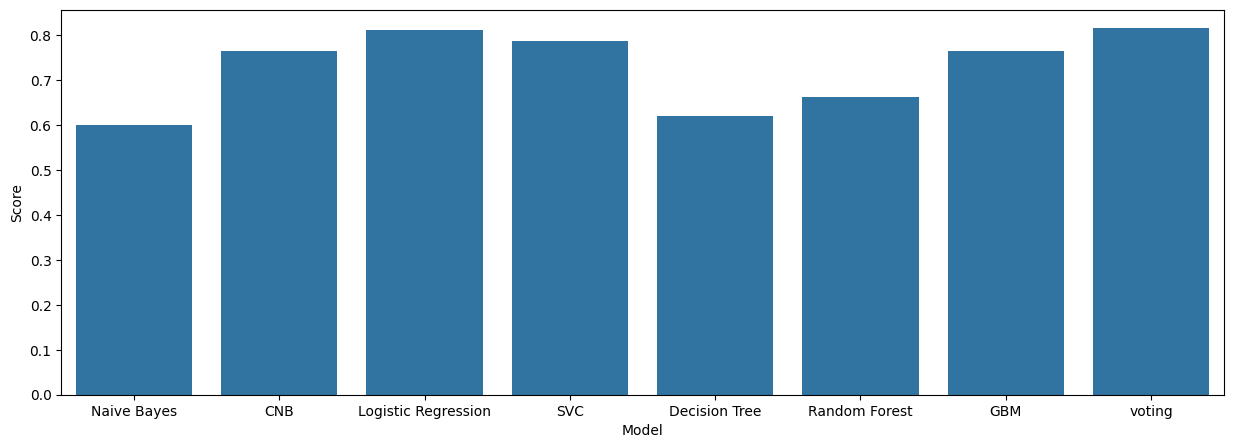

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(score_data, x = 'Model', y = 'Score')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

## 단어 우선 순위 5000 사용

우선순위 5000 데이터 뉴스의 최대 길이 :2376
우선순위 5000 데이터 뉴스의 평균 길이 :145.5398574927633


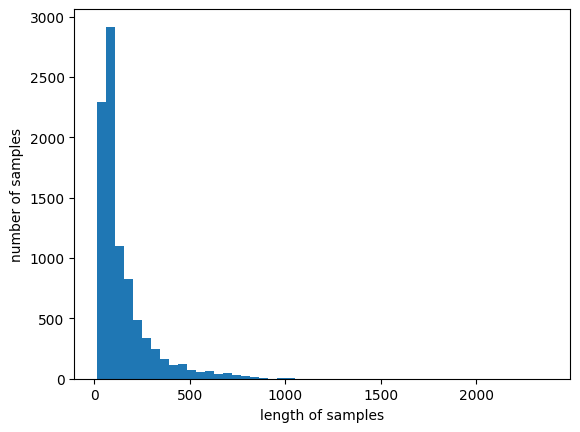

In [ ]:
print('우선순위 5000 데이터 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train2)))
print('우선순위 5000 데이터 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train2))/len(x_train2)))

plt.hist([len(s) for s in x_train2], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def analysis(x_train, x_test, y_train, y_test):
    # 텍스트로 변경
    x_train = translate_word(x_train)
    x_test = translate_word(x_test)

    # DTM 단어 사전
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    x_test_dtm = dtmvector.transform(x_test)

    # TF-IDF 단어 사전
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    tfidfv_test = tfidf_transformer.transform(x_test_dtm)

    # Model
    model_name = []
    model_score = []


    # Naive Bayes
    NB = MultinomialNB()
    NB_score = model_fit(NB, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('NB')
    model_score.append(NB_score)

    # CNB(Complement Naive Bayes Classifier)
    CNB = ComplementNB()
    CNB_score = model_fit(CNB, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('CNB')
    model_score.append(CNB_score)

    # Logistic Regression
    LR = LogisticRegression(C = 10000, penalty = 'l2', max_iter = 3000)
    LR_score = model_fit(LR, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('LR')
    model_score.append(LR_score)

    # SVM(Support Vector Machine)
    SVC = LinearSVC(C = 1000, penalty = 'l1', max_iter = 3000, dual = False)
    SVC_score = model_fit(SVC, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('SVC')
    model_score.append(SVC_score)

    # Decision Tree
    DT = DecisionTreeClassifier(max_depth = 10)
    DT_score = model_fit(DT, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('DT')
    model_score.append(DT_score)

    # Random Forest
    RF = RandomForestClassifier(n_estimators = 5)
    RF_score = model_fit(RF, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('RF')
    model_score.append(RF_score)

    # GBM(GradientBoostingClassifier)
    GBM = GradientBoostingClassifier()
    GBM_score = model_fit(GBM, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('GBM')
    model_score.append(GBM_score)

    # Votingd
    voting_classifier = VotingClassifier(
        estimators=[('LR', LR), ('CNB', CNB), ('GBM', GBM)],
        voting='soft'
    )

    Voting_score = model_fit(voting_classifier, tfidfv, tfidfv_test, y_train, y_test)
    model_name.append('Voting')
    model_score.append(Voting_score)

    print(model_name)
    print(model_score)
    return model_name, model_score


In [ ]:
def model_fit(model, tfidfv, tfidfv_test, y_train, y_test):
    model.fit(tfidfv, y_train)
    predicted = model.predict(tfidfv_test)
    score = f1_score(y_test, predicted, average = 'micro')

    return score

In [ ]:
model_name, model_score = analysis(x_train2, x_test2, y_train2, y_test2)

score_data = pd.DataFrame(model_score, model_name).reset_index()
score_data.columns = ['Model', 'Score']
score_data

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['NB', 'CNB', 'LR', 'SVC', 'DT', 'RF', 'GBM', 'Voting']
[0.6731967943009796, 0.7707034728406055, 0.8058771148708815, 0.7773820124666073, 0.6166518254674977, 0.6914514692787177, 0.7733748886910062, 0.8161175422974176]


,Model,Score
0,NB,0.673197
1,CNB,0.770703
2,LR,0.805877
3,SVC,0.777382
4,DT,0.616652
5,RF,0.691451
6,GBM,0.773375
7,Voting,0.816118


<Axes: xlabel='Model', ylabel='Score'>

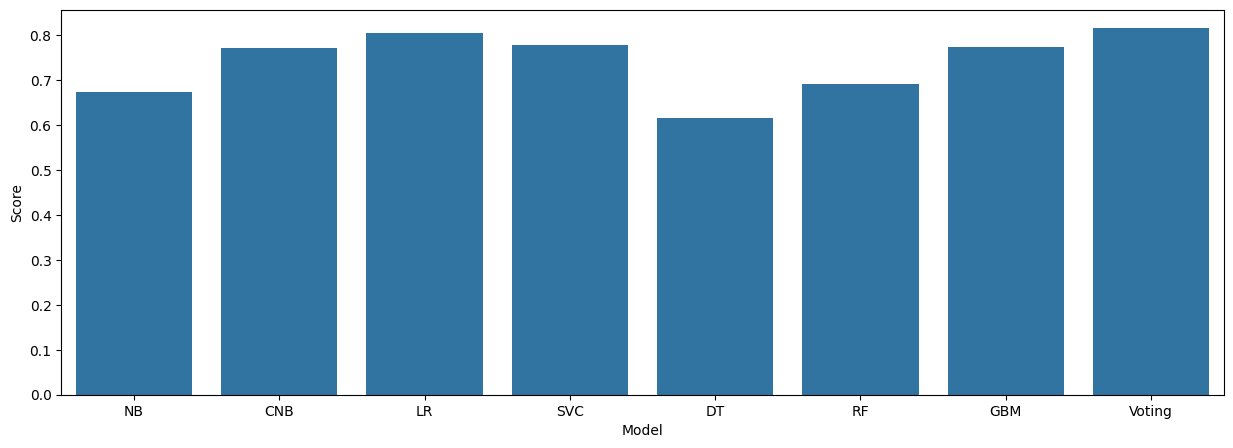

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(score_data, x = 'Model', y = 'Score')

## 단어 우선 순위 8000 사용

우선순위 5000 데이터 뉴스의 최대 길이 :2376
우선순위 5000 데이터 뉴스의 평균 길이 :145.5398574927633


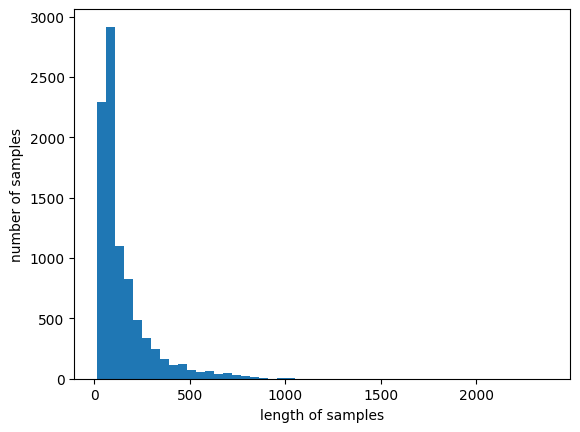

In [ ]:
print('우선순위 5000 데이터 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train3)))
print('우선순위 5000 데이터 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train3))/len(x_train3)))

plt.hist([len(s) for s in x_train3], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
model_name, model_score = analysis(x_train3, x_test3, y_train3, y_test3)

score_data = pd.DataFrame(model_score, model_name).reset_index()
score_data.columns = ['Model', 'Score']
score_data

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['NB', 'CNB', 'LR', 'SVC', 'DT', 'RF', 'GBM', 'Voting']
[0.6625111308993766, 0.7707034728406055, 0.807212822796082, 0.7858414959928762, 0.6202137132680321, 0.6638468388245771, 0.7658058771148709, 0.8147818343722173]


,Model,Score
0,NB,0.662511
1,CNB,0.770703
2,LR,0.807213
3,SVC,0.785841
4,DT,0.620214
5,RF,0.663847
6,GBM,0.765806
7,Voting,0.814782


<Axes: xlabel='Model', ylabel='Score'>

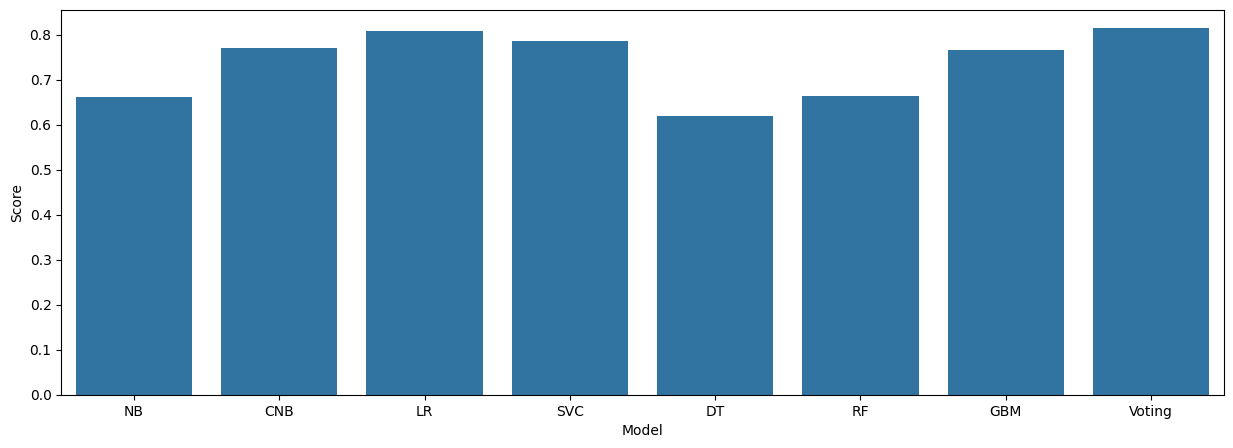

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(score_data, x = 'Model', y = 'Score')

## Result
### >> Voting 방법이 가장 성능이 좋음
- #### 모든 단어 사용 : 0.816563
- #### 단어 우선 순위 5000 : 0.816118
- #### 단어 우선 순위 8000 : 0.814782

<br/>

### >> 모든 단어를 사용하였을 때 성능이 가장 좋음|